In [2]:
import pandas as pd        
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline
from plotly.offline import init_notebook_mode, download_plotlyjs, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import warnings                   
warnings.filterwarnings("ignore")

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [83]:
bank_train= pd.read_csv("bank.csv")
bank_train.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [87]:
print("The Bank Marketing Dataset consists of")
print("Number of Rows:", bank_train.shape[0])
print("Number of Columns:", bank_train.shape[1])

The Bank Marketing Dataset consists of
Number of Rows: 11162
Number of Columns: 17


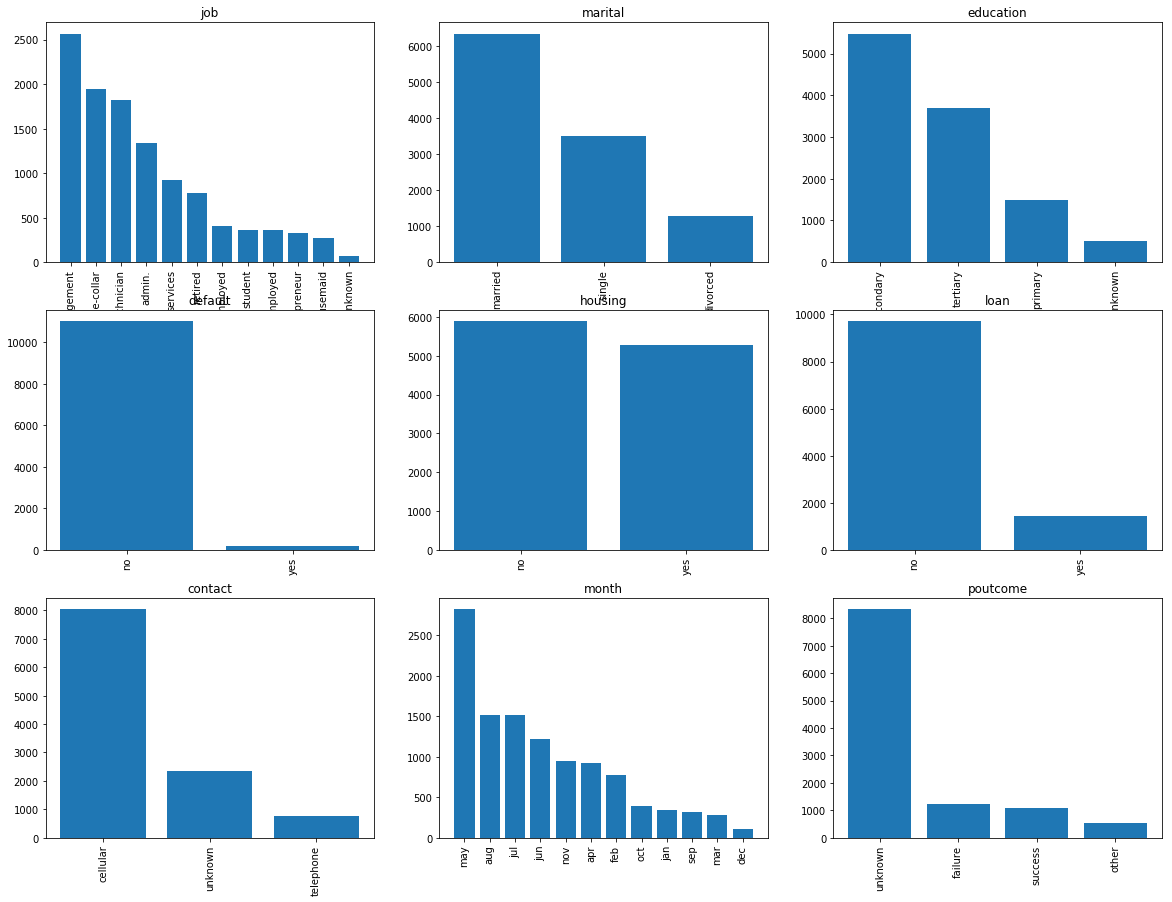

In [64]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = bank_train[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

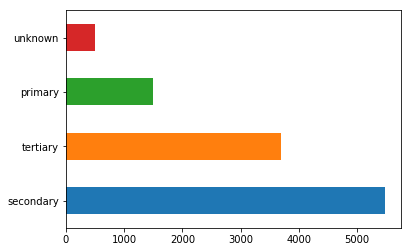

In [68]:

bank_train.education.value_counts().plot(kind="barh")

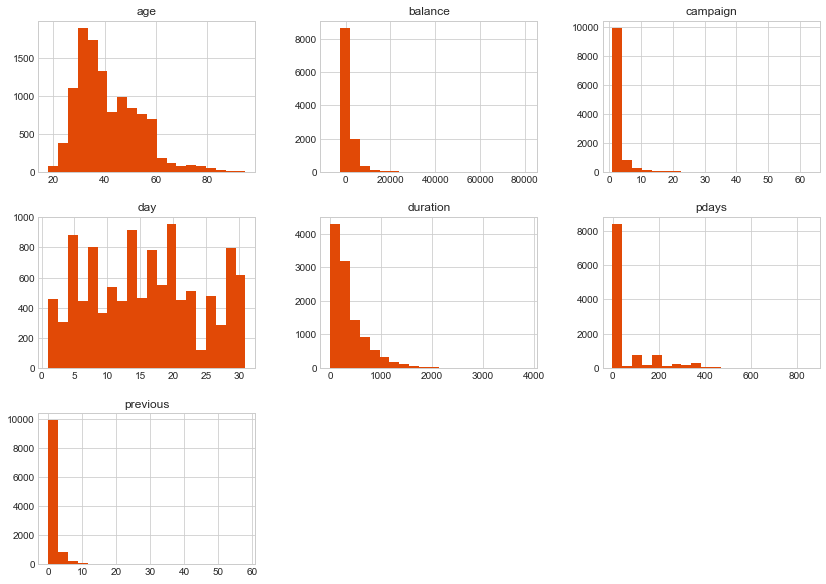

In [92]:
# Let's see how the numeric data is distributed.

plt.style.use('seaborn-whitegrid')

bank_train.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


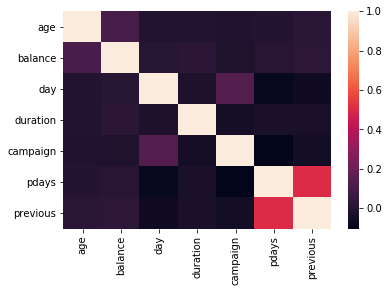

In [69]:
corr = bank_train.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

#### As per the Correlation Matrix and Heatmap, Observations were made as follows:

Data is non-linear, asymmetric

Hence selection of features will not depend upon correlation factor.

Also not a single feature is correlated completely with class, hence requires combinantion of features.

Text(0.5,1,'Education Level vs Marital Status Distribution')

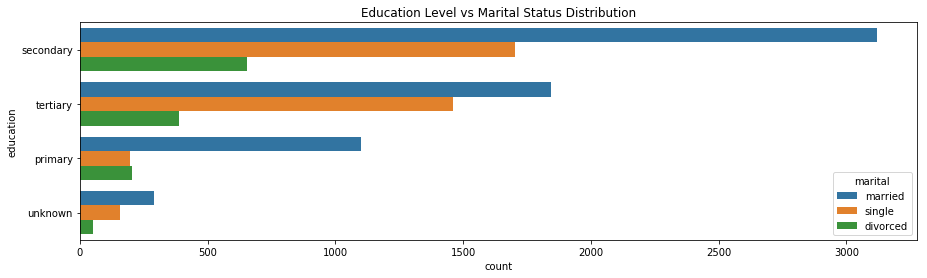

In [73]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="education", hue='marital', data=bank_train).set_title('Education Level vs Marital Status Distribution')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

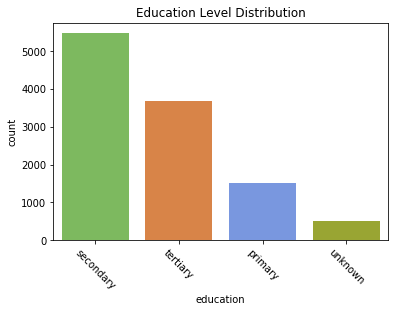

In [71]:


color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

sns.countplot(x='education', data=bank_train, palette=color_types).set_title('Education Level Distribution');

plt.xticks(rotation=-45)

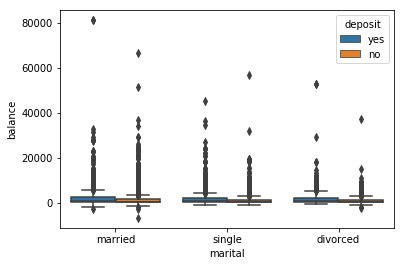

In [53]:
sns.boxplot(x="marital", y="balance", hue="deposit", data=bank_train)

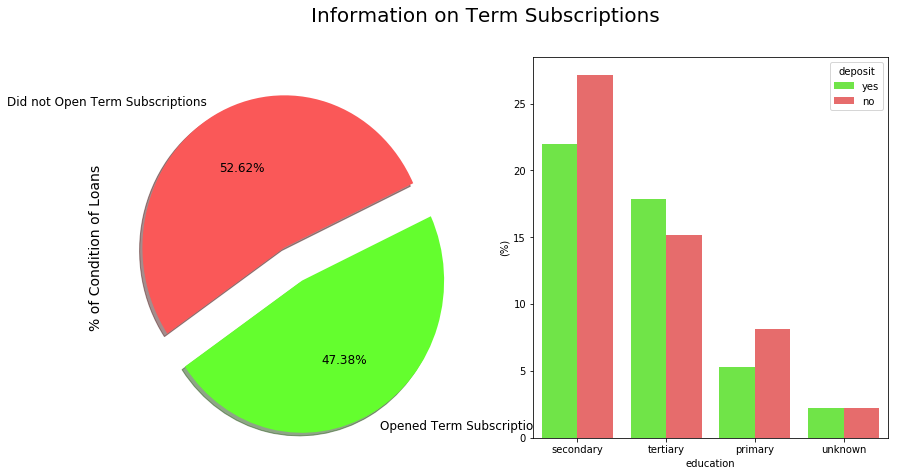

In [60]:
f, ax = plt.subplots(1,2, figsize=(14,7))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Subscriptions", "Opened Term Subscriptions"

plt.suptitle('Information on Term Subscriptions', fontsize=20)

bank_train["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=bank_train, palette=palette, estimator=lambda x: len(x) / len(bank_train) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(bank_train["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

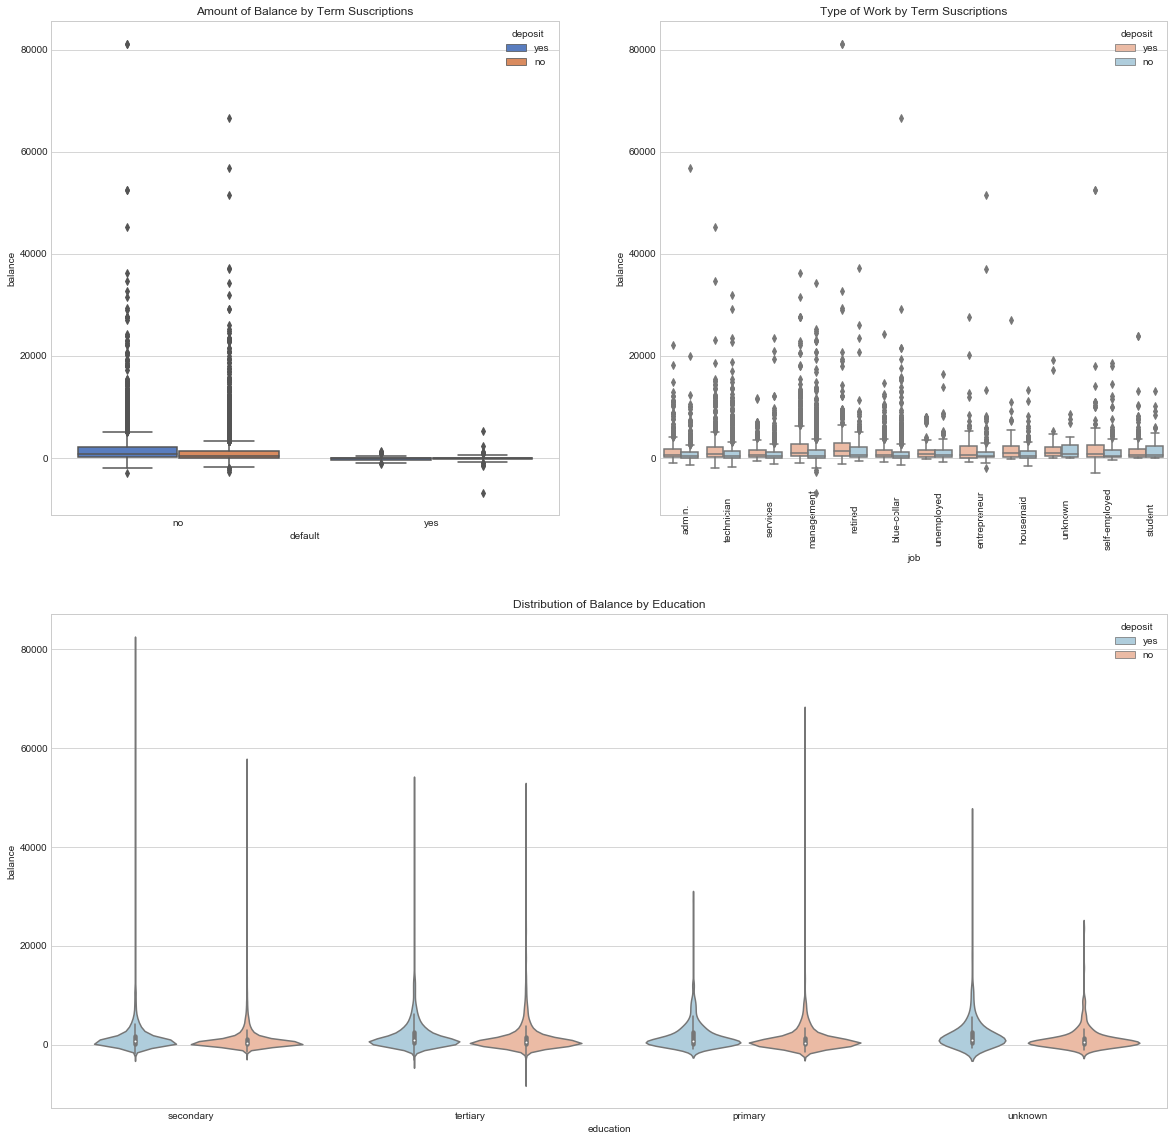

In [29]:

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=bank_train, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")


g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=bank_train, palette="RdBu", ax=ax2)

g1.set_xticklabels(bank_train["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=bank_train, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

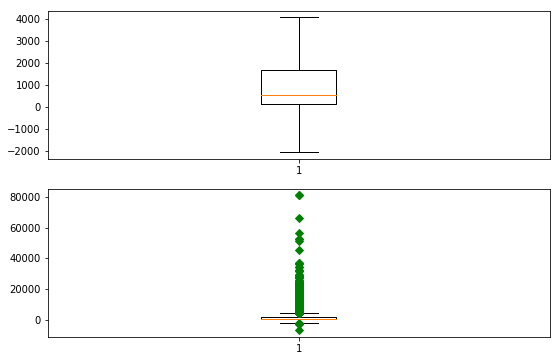

In [22]:
fig = plt.figure(1, figsize=(9, 6))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(bank_train.balance,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(bank_train.balance,0,'gD')
plt.show()

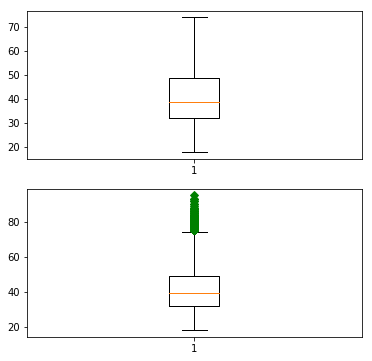

In [57]:
fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(211)
bp = ax.boxplot(bank_train.age,0,'')
ax = fig.add_subplot(212)
bp = ax.boxplot(bank_train.age,0,'gD')
plt.show()

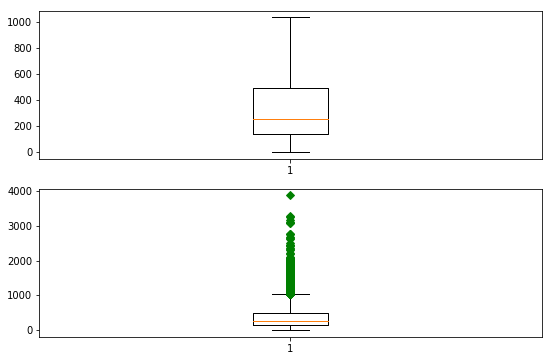

In [56]:
fig = plt.figure(1, figsize=(9, 6))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(bank_train.duration,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(bank_train.duration,0,'gD')
plt.show()

In [93]:
bank_train[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,11162.000000,11162.000000,11162.000000
mean,51.330407,2.508421,0.832557
std,108.758282,2.722077,2.292007
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,20.750000,3.000000,1.000000
max,854.000000,63.000000,58.000000


In [94]:
len (bank_train[bank_train['pdays'] > 400] ) / len(bank_train) * 100

1.2005017022039062

In [95]:
len (bank_train[bank_train['campaign'] > 34] ) / len(bank_train) * 100

0.035835871707579285

In [96]:
len (bank_train[bank_train['previous'] > 34] ) / len(bank_train) * 100

0.04479483963447411

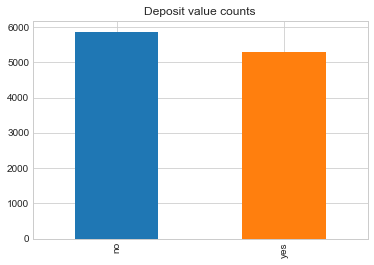

In [97]:
value_counts = bank_train['deposit'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts')

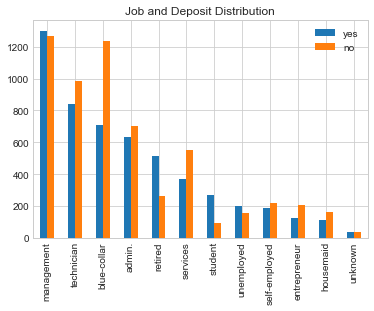

In [114]:
# Job and Deposit Distribution

j_df = pd.DataFrame()

j_df['yes'] = bank_train[bank_train['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = bank_train[bank_train['deposit'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and Deposit Distribution')

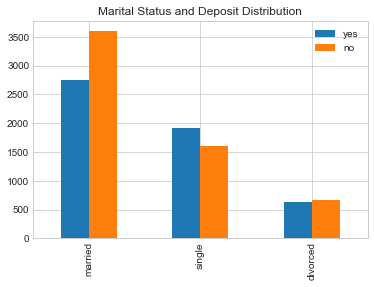

In [113]:
# Marital Status and Deposit Distribution

j_df = pd.DataFrame()

j_df['yes'] = bank_train[bank_train['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = bank_train[bank_train['deposit'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital Status and Deposit Distribution')

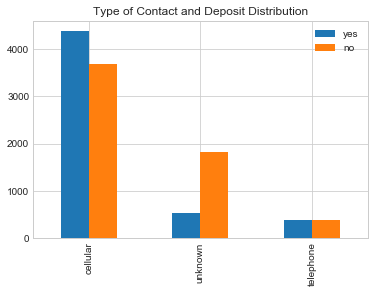

In [112]:
# Type of Contact and Deposit Distribution

j_df = pd.DataFrame()

j_df['yes'] = bank_train[bank_train['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = bank_train[bank_train['deposit'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of Contact and Deposit Distribution')

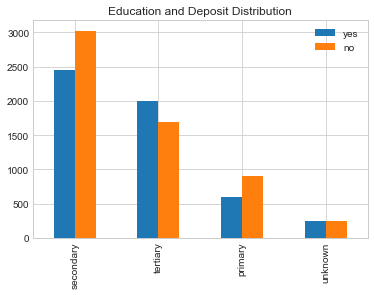

In [111]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = bank_train[bank_train['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = bank_train[bank_train['deposit'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and Deposit Distribution')

In [115]:
#balance and deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (bank_train[bank_train['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
b_df['balance_no'] = (bank_train[bank_train['deposit'] == 'no'][['deposit','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,5289.000000,5873.000000
mean,1804.267915,1280.227141
std,3501.104777,2933.411934
min,-3058.000000,-6847.000000
25%,210.000000,64.000000
50%,733.000000,414.000000
75%,2159.000000,1324.000000
max,81204.000000,66653.000000


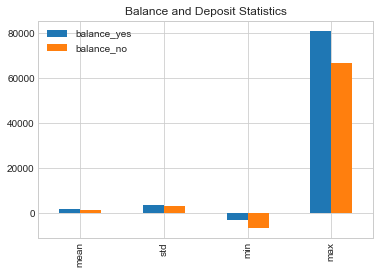

In [117]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and Deposit Statistics')

In [118]:
# Age and Deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (bank_train[bank_train['deposit'] == 'yes'][['deposit','age']].describe())['age']
a_df['age_no'] = (bank_train[bank_train['deposit'] == 'no'][['deposit','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,5873.000000
mean,41.670070,40.837391
std,13.497781,10.264815
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,89.000000


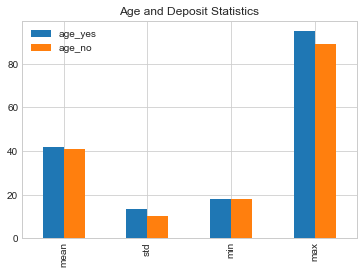

In [120]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and Deposit Statistics')

In [123]:
# Number of contacts performed during this campaign ('campaign') and deposit

c_df = pd.DataFrame()
c_df['campaign_yes'] = (bank_train[bank_train['deposit'] == 'yes'][['deposit','campaign']].describe())['campaign']
c_df['campaign_no'] = (bank_train[bank_train['deposit'] == 'no'][['deposit','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,5289.000000,5873.000000
mean,2.141047,2.839264
std,1.921826,3.244474
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


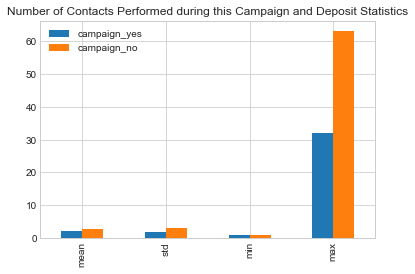

In [125]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of Contacts Performed during this Campaign and Deposit Statistics')

In [126]:
# Number of contacts performed during previous campaign ('previous') and deposit

p_df = pd.DataFrame()
p_df['previous_yes'] = (bank_train[bank_train['deposit'] == 'yes'][['deposit','previous']].describe())['previous']
p_df['previous_no'] = (bank_train[bank_train['deposit'] == 'no'][['deposit','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.000000,5873.00000
mean,1.170354,0.52835
std,2.553272,1.97961
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,1.000000,0.00000
max,58.000000,41.00000


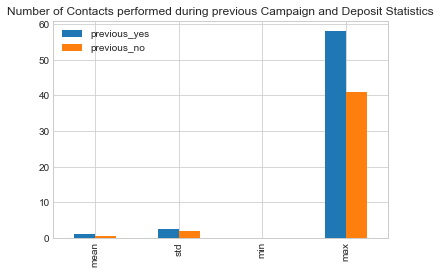

In [128]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of Contacts performed during previous Campaign and Deposit Statistics')

#### Looking at the diagrams above we can conclude that:

People who subscribed for term deposit tend to have greater balance and age values.

People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

In [154]:
def get_dummy_from_bool(row, column_name):
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, bank_train):

    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = bank_train[bank_train[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(bank_train):
  
    cleaned_df = bank_train.copy()
    
    bool_columns = ['default', 'housing', 'loan', 'deposit']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = bank_train.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
   
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
  
    cleaned_df = cleaned_df.drop(columns = ['pdays'])
   
    cleaned_df['campaign_cleaned'] = bank_train.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = bank_train.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df

In [183]:

cleaned_df = clean_data(bank_train)
cleaned_df.head(3)

,age,balance,day,duration,default_bool,housing_bool,loan_bool,deposit_bool,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,59,2343,5,1042,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
1,56,45,5,1467,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
2,41,1270,5,1389,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0


In [159]:
X = cleaned_df.drop(columns = 'deposit_bool')
y = cleaned_df[['deposit_bool']]

In [160]:
TEST_SIZE = 0.3
RAND_STATE = 42

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [167]:
import warnings                   
warnings.filterwarnings("ignore")

In [168]:
# Training the XGBoost Classifier Model

xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)

#calculate and print scores for the model for top 15 features
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('The XGB Model Accuracy Score for the trained dataset is: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

The XGB Model Accuracy Score for the trained dataset is: 0.912: test: 0.850
